In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib
#%matplotlib qt
import numpy as np
from matplotlib import rcParams
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from IPython.display import display, Math

#matplotlib.use('Agg')

rcParams["axes.labelsize"] = '13'
rcParams["axes.titlesize"] = '17'
rcParams["axes.linewidth"] = '0.5'
rcParams["font.size"] = '7'
rcParams["xtick.labelsize"] = '15'
rcParams["ytick.labelsize"] = '15'
rcParams["xtick.major.width"] = '0.5'
rcParams["ytick.major.width"] = '0.5'
rcParams["xtick.major.size"] = '3'
rcParams["ytick.major.size"] = '3'
rcParams["xtick.direction"] = 'in'
rcParams["ytick.direction"] = 'in'
rcParams["xtick.major.pad"] = '5'
rcParams["ytick.major.pad"] = '5'
rcParams["axes.labelpad"] = '10'
rcParams["axes.grid"] = 'True'
rcParams["xtick.top"] = 'True'
rcParams["ytick.right"] = 'True'

         
rcParams['font.sans-serif'] = 'Arial'         
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'serif'

rcParams['pdf.fonttype'] = '42'

In [2]:
h = 6.62607015e-34 # Planck's constant codata
c = 299792458 # speed of light in vacuum
ϵ0 = 8.8541878128e-12 # vacuum permittivity in C^2⋅N^−1⋅m^−2 codata
μ0 = 4*np.pi*1e-7 # vacuum permeability
ħ = h/(2*np.pi) # reduced Planck's const
kB = 1.380649e-23 # Boltzman's const codata value codata
u = 1.66053906660e-27 # atomic mass unit in kg codata
e = 1.602176634e-19 # elementary charge in Coulomb (NIST codata)
N_A = 6.02214076e23 # Avogadro's number codata
m_e = 9.1093837015e-31 # codata value (https://physics.nist.gov/cgi-bin/cuu/Value?me)
m_p = 1.67262192369e-27 # codata value of proton mass

## Conductance vs L/a ratio plots

https://www.lesker.com/newweb/technical_info/vacuumtech/conductance_02_calcconductance.cfm

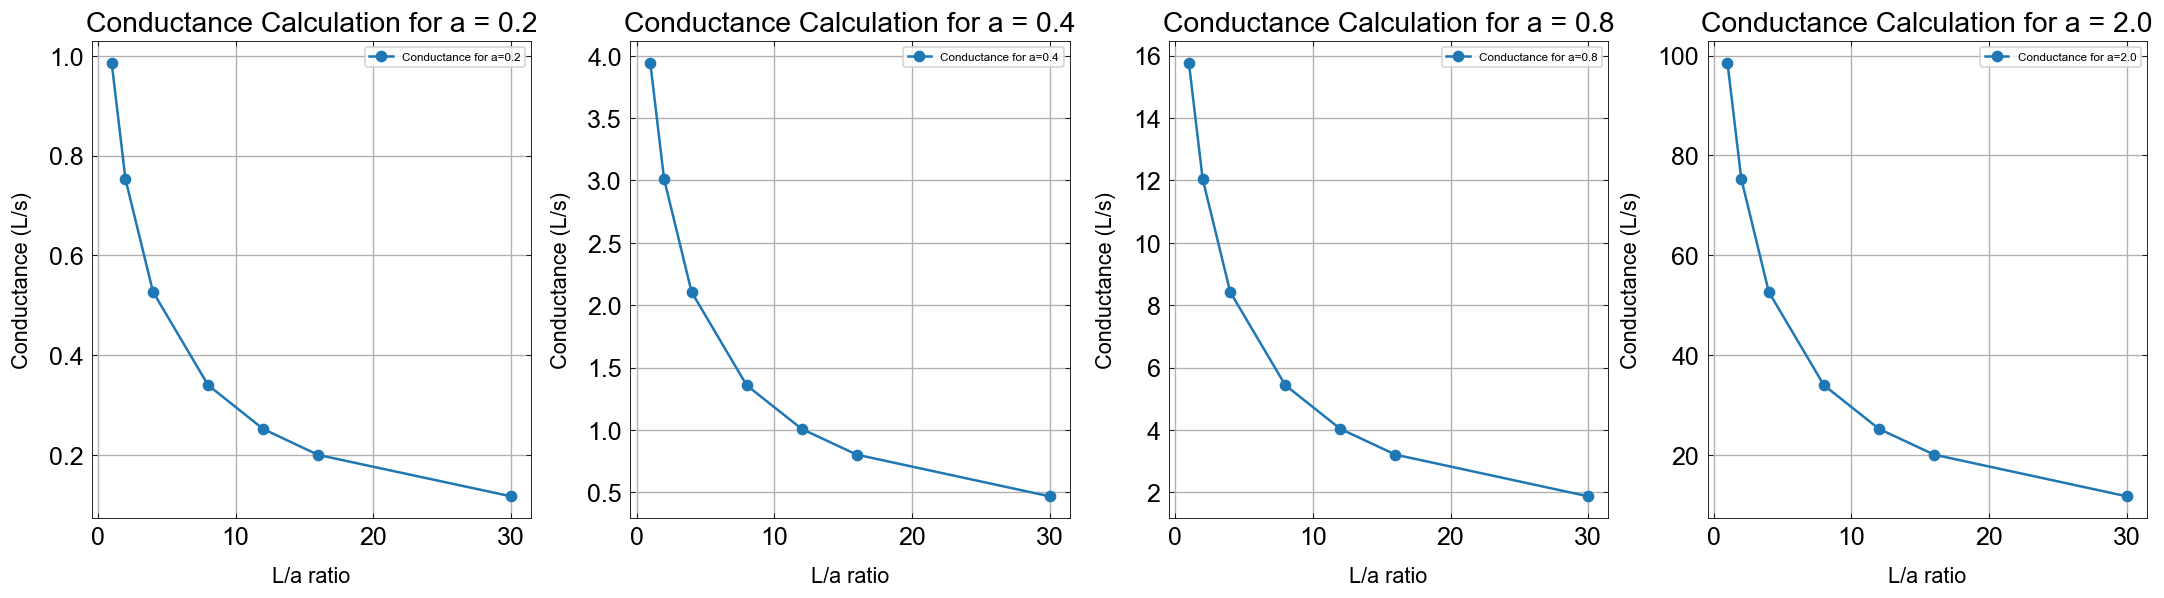

In [18]:
import matplotlib.pyplot as plt

# Data for each a value
a_values = [0.2, 0.4, 0.8, 2.0]
L_over_a_ratios = [ 
    [1, 2, 4, 8, 12, 16, 30],  # For a = 0.2
    [1, 2, 4, 8, 12, 16, 30],  # For a = 0.4
    [1, 2, 4, 8, 12, 16, 30],   # For a = 0.8
    [1, 2, 4, 8, 12, 16, 30]   # For a = 2.0
]
conductances = [
    [0.986, 0.753, 0.527, 0.340, 0.252, 0.200, 0.117],  # For a = 0.2
    [3.943, 3.013, 2.106, 1.358, 1.008, 0.802, 0.468],  # For a = 0.4
    [15.770, 12.050, 8.424, 5.436, 4.033, 3.208, 1.871], # For a = 0.8
    [98.56, 75.34, 52.65, 33.97, 25.21, 20.05, 11.69] # For a = 2.0
]

# Plotting each a value on a separate plot
fig, axes = plt.subplots(1, 4, figsize=(18, 5), dpi=120)

for i, a in enumerate(a_values):
    ax = axes[i]
    ax.plot(L_over_a_ratios[i], conductances[i], 'o-', label=f'Conductance for a={a}')
    
    ax.set_xlabel('L/a ratio')
    ax.set_ylabel('Conductance (L/s)')
    ax.set_title(f'Conductance Calculation for a = {a}')
    ax.legend()

plt.tight_layout()
plt.show()


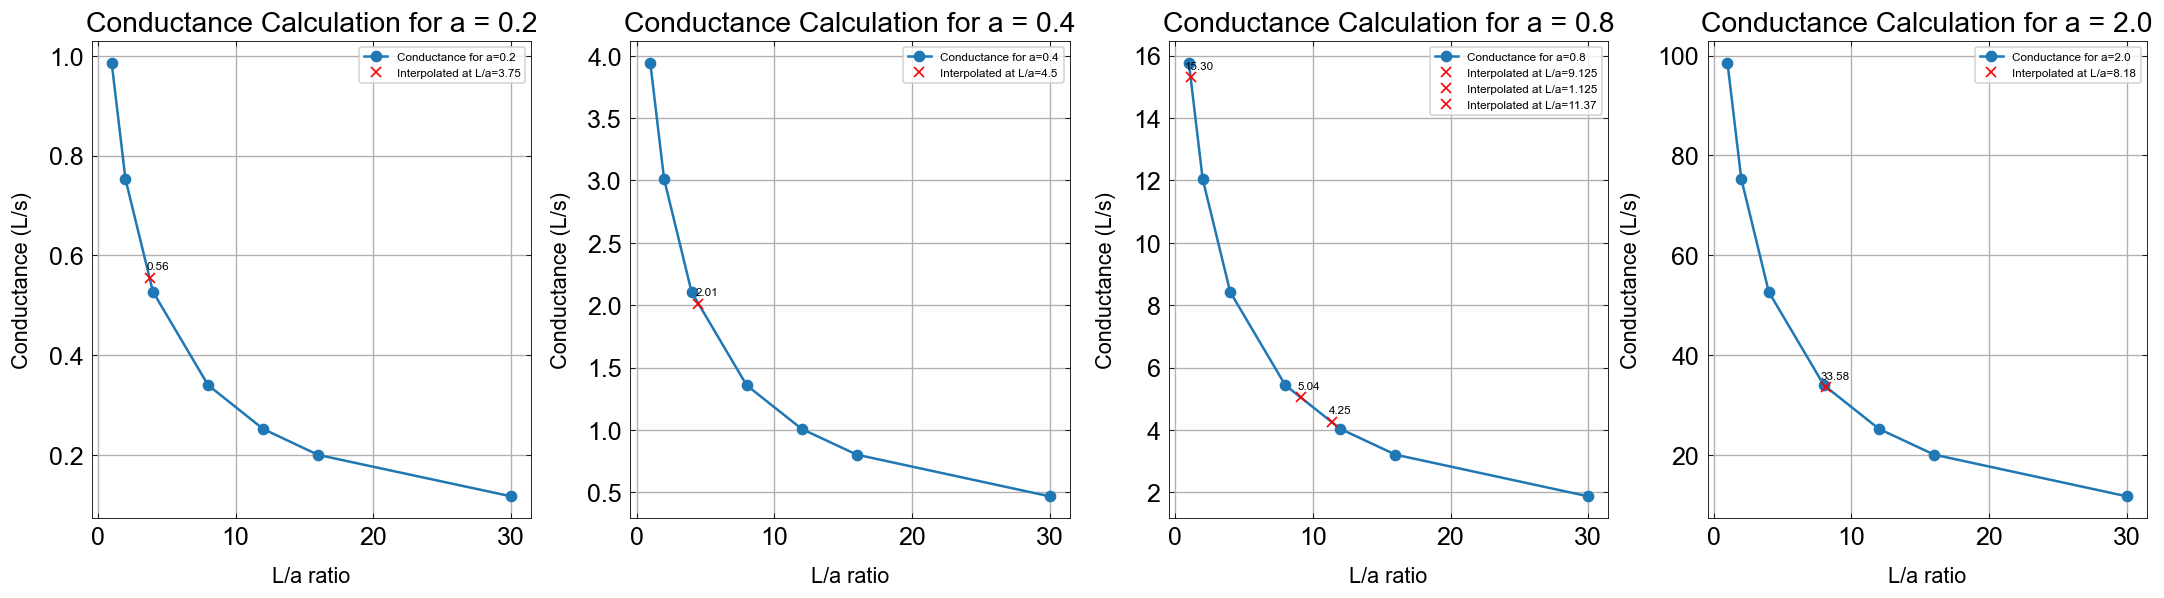

Conductance at L/a ratio 4.5 with a = 0.4 is approximately 2.012 L/s
Conductance at L/a ratio 9.125 with a = 0.8 is approximately 5.041 L/s
Conductance at L/a ratio 8.18 with a = 2.0 is approximately 33.576 L/s
Conductance at L/a ratio 1.125 with a = 0.8 is approximately 15.305 L/s
Conductance at L/a ratio 11.37 with a = 0.8 is approximately 4.254 L/s
Conductance at L/a ratio 3.75 with a = 0.2 is approximately 0.555 L/s


In [26]:
# Interpolation targets
target_ratios = {
    (0.4, 4.5): np.interp(4.5, L_over_a_ratios[1], conductances[1]),      # a = 0.4, L/a = 4.5
    (0.8, 9.125): np.interp(9.125, L_over_a_ratios[2], conductances[2]),  # a = 0.8, L/a = 9.125
    (2.0, 8.18): np.interp(8.18, L_over_a_ratios[3], conductances[3]),  # a = 2.0, L/a = 8.18
    (0.8, 1.125): np.interp(1.125, L_over_a_ratios[2], conductances[2]),  # a = 0.8, L/a = 1.125
    (0.8, 11.37): np.interp(11.37, L_over_a_ratios[2], conductances[2]),  # a = 0.8, L/a = 11.37
    (0.2, 3.75): np.interp(3.75, L_over_a_ratios[0], conductances[0])     # a = 0.2, L/a = 3.75
}

# Plot each a value separately
fig, axes = plt.subplots(1, 4, figsize=(18, 5), dpi=120)
for i, a in enumerate(a_values):
    ax = axes[i]
    ax.plot(L_over_a_ratios[i], conductances[i], 'o-', label=f'Conductance for a={a}')
    
    # Add interpolated points if they exist for this 'a'
    for (a_key, L_a_ratio), conductance in target_ratios.items():
        if a_key == a:
            ax.plot(L_a_ratio, conductance, 'rx', label=f'Interpolated at L/a={L_a_ratio}')
            ax.annotate(f"{conductance:.2f}", (L_a_ratio, conductance), textcoords="offset points", xytext=(5,5), ha='center')

    ax.set_xlabel('L/a ratio')
    ax.set_ylabel('Conductance (L/s)')
    ax.set_title(f'Conductance Calculation for a = {a}')
    ax.legend()

plt.tight_layout()
plt.show()

# Print results
for (a, L_a_ratio), conductance in target_ratios.items():
    print(f"Conductance at L/a ratio {L_a_ratio} with a = {a} is approximately {conductance:.3f} L/s")


In [23]:
C1 = 2.012
C2 = 5.041
C3 = 33.576
C4 = 15.305
C5 = 0.555

# Calculate C_left using the correct formula
C_left = 1 / (1 / C1 + 1 / C2 + 1 / C3)

# Calculate C_right using the correct formula
C_right = 1 / (1 / C3 + 1 / C4 + 1 / C5)

print('C_left = ', C_left, 'l/s')
print('C_right = ', C_right, 'l/s')


C_left =  1.3789786106417705 l/s
C_right =  0.5271694974526656 l/s


In [28]:
C1 = 33.575
C2 = 4.25

C_sch = 1 / (1/C1 + 1/C2)
print('C_sch = ', C_sch, 'l/s')

C_sch =  3.772471910112359 l/s


In [25]:
9.1/0.8

11.374999999999998

In [29]:
55/1.5


36.666666666666664